In [1]:
import pandas as pd

file_path = 'G:/Hangkai/Forest_edge_mapping_data/processed_country_data_with_area.csv'
country_data = pd.read_csv(file_path)

china_row = country_data[country_data['country'] == 'China']
taiwan_row = country_data[country_data['country'] == 'Taiwan']

if not china_row.empty and not taiwan_row.empty:
    columns_to_sum = country_data.columns.difference(['country'])
    for column in columns_to_sum:
        country_data.loc[country_data['country'] == 'China', column] += taiwan_row[column].values[0]
    country_data = country_data[country_data['country'] != 'Taiwan']

country_data.head()


C:\Users\hyou34\AppData\Local\miniconda3\envs\py39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\hyou34\AppData\Local\miniconda3\envs\py39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\hyou34\AppData\Local\miniconda3\envs\py39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\hyou34\AppData\Local\miniconda3\envs\py39\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\hyou34\AppData\Local\Temp\ipykernel_96772\3443941564.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with

,country,stable,stable_per2000,stable_per2020,increase increase,increase increase percent,increase decrease,increase decrease percent,decrease increase,decrease increase percent,...,forest edge 2020,Unchanged Forest Area,Increased Forest Area 2020,Decreased Forest Area 2000,Total Forest Area 2000,Total Forest Area 2020,decrease rate,increase rate,Area Change,Edge Change
0,Indonesia,2.932940e+06,0.547937,0.585812,377782.3233,0.075456,1.695902e+06,0.338732,1.458103e+06,0.272406,...,5.006624e+06,1.474394e+06,48603.287350,89282.524090,1.563676e+06,1.522997e+06,0.057098,0.031913,-0.026015,-0.064653
1,Malaysia,2.921738e+05,0.423681,0.383578,63868.5001,0.083849,4.056648e+05,0.532573,2.826837e+05,0.409920,...,7.617070e+05,2.752761e+05,10048.507260,21272.398800,2.965485e+05,2.853246e+05,0.071733,0.035218,-0.037848,0.104551
2,Chile,1.523514e+06,0.791067,0.838995,138571.9005,0.076311,1.537945e+05,0.084694,2.339075e+05,0.121454,...,1.815880e+06,1.623306e+05,7197.778945,7392.213558,1.697228e+05,1.695284e+05,0.043555,0.042458,-0.001146,-0.057125
3,Bolivia,1.548777e+06,0.719363,0.738685,158406.1880,0.075551,3.894838e+05,0.185763,2.318779e+05,0.107701,...,2.096667e+06,5.571181e+05,6196.640349,39615.066220,5.967332e+05,5.633148e+05,0.066387,0.011000,-0.056002,-0.026158
4,Peru,9.658076e+05,0.769824,0.708248,107564.7010,0.078880,2.902844e+05,0.212872,1.654066e+05,0.131842,...,1.363657e+06,7.762328e+05,4311.612493,11962.057580,7.881949e+05,7.805444e+05,0.015177,0.005524,-0.009706,0.086941


# Regression Analysis and Residual Calculation for 2000

In [2]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

log_forest_area = np.log(country_data['Total Forest Area 2000'])
log_forest_edge = np.log(country_data['forest edge 2000'])

slope, intercept, r_value, p_value, std_err = stats.linregress(log_forest_edge, log_forest_area)

def log_log_regression_model(log_x):
    return intercept + slope * log_x

log_estimated_forest_area = log_log_regression_model(log_forest_edge)
estimated_forest_area = np.exp(log_estimated_forest_area)


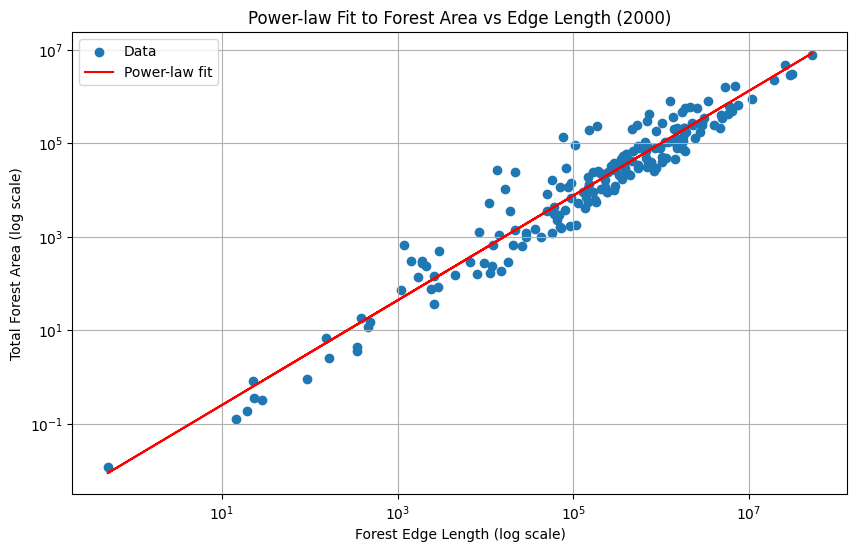

slope: 1.118206963453679 exp(intercept): 0.01952422285980013 r2: 0.9319987760236769 p_value: 1.606126225880505e-110


In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(country_data['forest edge 2000'], country_data['Total Forest Area 2000'], label='Data')
plt.plot(country_data['forest edge 2000'], estimated_forest_area, color='red', label='Power-law fit')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Forest Edge Length (log scale)')
plt.ylabel('Total Forest Area (log scale)')
plt.title('Power-law Fit to Forest Area vs Edge Length (2000)')
plt.legend()
plt.grid(True)
plt.show()

print('slope:', slope, 'exp(intercept):', np.exp(intercept), 'r2:', r_value*r_value, 'p_value:', p_value)


# Residuals and Inequality Index Calculation for 2000 and 2020

In [4]:
country_data['log_residuals2000'] = log_forest_area - log_estimated_forest_area
country_data['log_fragmentation_rank2000'] = country_data['log_residuals2000'].abs().rank(ascending=False)

log_forest_area_2020 = np.log(country_data['Total Forest Area 2020'])
log_forest_edge_2020 = np.log(country_data['forest edge 2020'])

log_estimated_forest_area_2020 = log_log_regression_model(log_forest_edge_2020)
estimated_forest_area_2020 = np.exp(log_estimated_forest_area_2020)

country_data['log_residuals2020'] = log_forest_area_2020 - log_estimated_forest_area_2020
country_data['log_fragmentation_rank2020'] = country_data['log_residuals2020'].abs().rank(ascending=False)


# Visualization

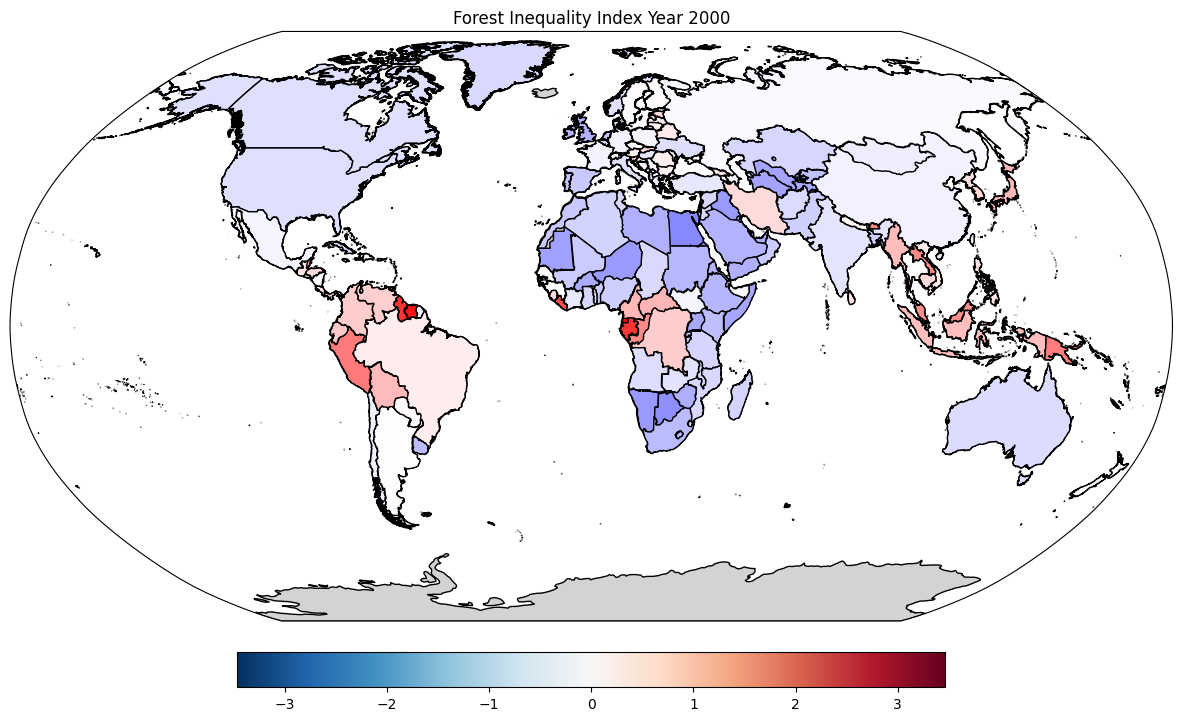

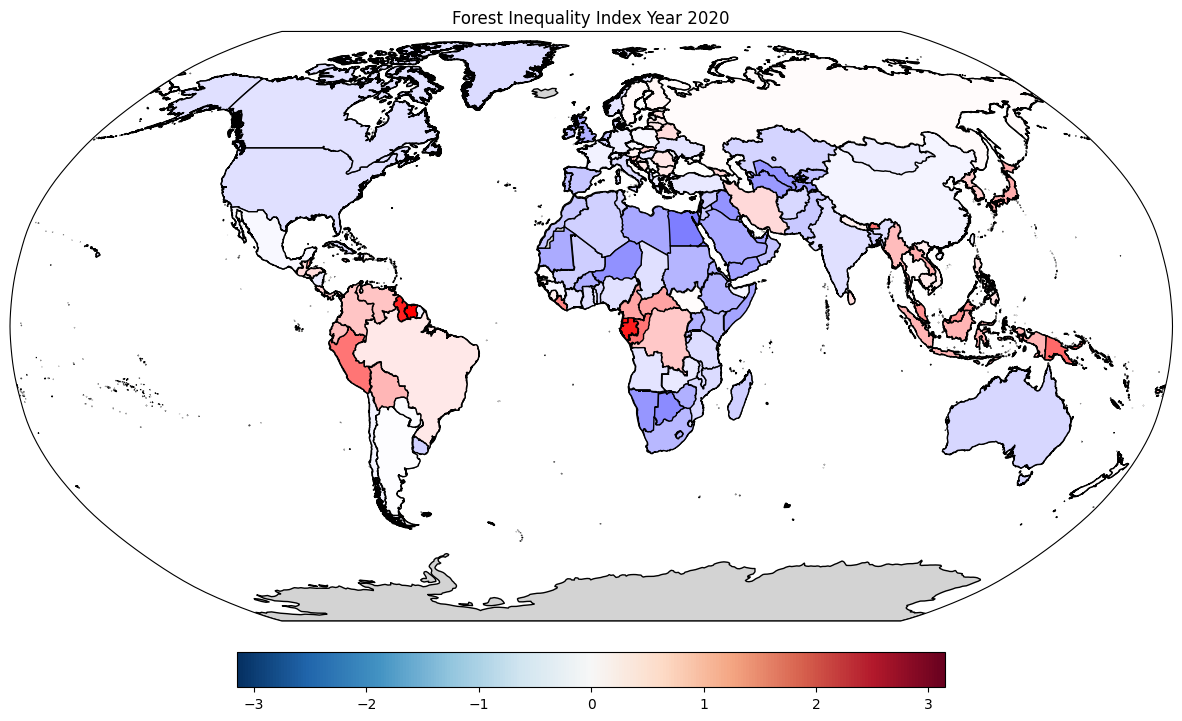

In [8]:
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from matplotlib.lines import Line2D
import matplotlib as mpl
import cartopy

def get_color(deviation, max_deviation):
    color_intensity = np.abs(deviation) / max_deviation
    if deviation > 0:
        return (1, 1-color_intensity, 1-color_intensity)  # shades of red
    elif deviation < 0:
        return (1-color_intensity, 1-color_intensity, 1)  # shades of blue
    else:
        return 'grey'

def plot_inequality_map(year, residual_column):
    fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})
    ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='lightgrey')

    shapename = 'admin_0_countries'
    countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

    max_deviation = max(abs(country_data[residual_column]))
    for country in shpreader.Reader(countries_shp).records():
        country_name = country.attributes['SOVEREIGNT']
        if country_name in country_data['country'].values:
            deviation = country_data[country_data['country'] == country_name][residual_column].values[0]
            color = get_color(deviation, max_deviation)
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black')
        if country_name == "Taiwan":
            deviation = country_data[country_data['country'] == "China"][residual_column].values[0]
            color = get_color(deviation, max_deviation)
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black')
            
    norm = mpl.colors.Normalize(vmin=-max_deviation, vmax=max_deviation)
    cmap = mpl.cm.RdBu_r
    scalar_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    cbar = plt.colorbar(scalar_map, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
    plt.title(f'Forest Inequality Index Year {year}')
    plt.show()

plot_inequality_map(2000, 'log_residuals2000')
plot_inequality_map(2020, 'log_residuals2020')

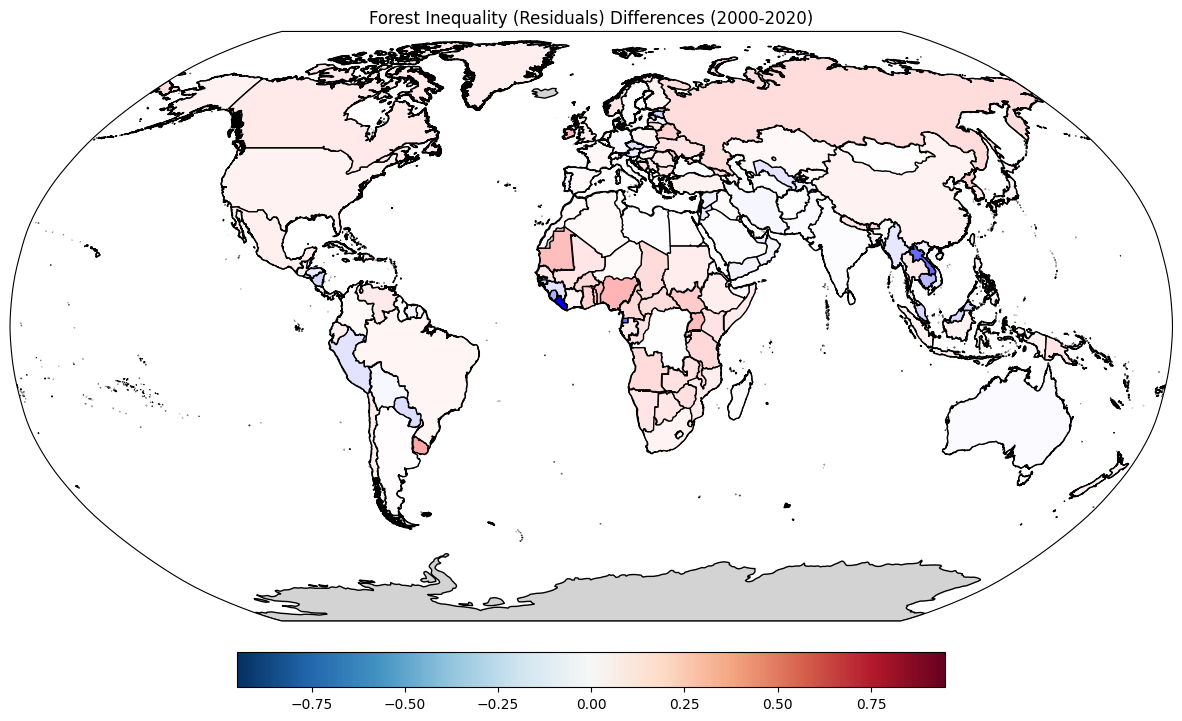

In [9]:
def plot_residuals_difference_map():
    fig, ax = plt.subplots(1, 1, figsize=(15, 10), subplot_kw={'projection': ccrs.Robinson()})
    ax.add_feature(cartopy.feature.LAND, edgecolor='black', facecolor='lightgrey')

    shapename = 'admin_0_countries'
    countries_shp = shpreader.natural_earth(resolution='10m', category='cultural', name=shapename)

    max_deviation = max(abs(country_data['log_residuals2020'] - country_data['log_residuals2000']))
    for country in shpreader.Reader(countries_shp).records():
        country_name = country.attributes['SOVEREIGNT']
        if country_name in country_data['country'].values:
            deviation = country_data[country_data['country'] == country_name]['log_residuals2020'].values[0] - country_data[country_data['country'] == country_name]['log_residuals2000'].values[0]
            color = get_color(deviation, max_deviation)
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black')
        if country_name == "Taiwan":
            deviation = country_data[country_data['country'] == "China"]['log_residuals2020'].values[0] - country_data[country_data['country'] == "China"]['log_residuals2000'].values[0]
            color = get_color(deviation, max_deviation)
            ax.add_geometries(country.geometry, ccrs.PlateCarree(), facecolor=color, edgecolor='black')
            
    norm = mpl.colors.Normalize(vmin=-max_deviation, vmax=max_deviation)
    cmap = mpl.cm.RdBu_r
    scalar_map = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
    cbar = plt.colorbar(scalar_map, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
    plt.title('Forest Inequality (Residuals) Differences (2000-2020)')
    plt.show()

plot_residuals_difference_map()
